## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#create file path and load data
path = r'C:\Users\krist\ATX Metro Bike'
metrobikes = pd.read_pickle(os.path.join(path, '02.Data', 'PreparedData', 'metrobikes_with_zips.pkl'))
metrobikes.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,...,Return Kiosk Geographic Location,Return Kiosk Dock Count,Checkout Day of Month,Checkout Hour of Day,Checkout Kiosk Latitude,Checkout Kiosk Longitude,Return Kiosk Latitude,Return Kiosk Longitude,Trip Time Category,Kiosk_Zipcode
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,3,12,2017,...,"(30.26634, -97.74378)",15.0,1,9,30.269800,-97.741859,30.266340,-97.743782,Short trip,78701.0
1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,14,3,2015,...,"(30.26634, -97.74378)",15.0,13,16,30.266340,-97.743782,30.266340,-97.743782,Typical Trip,78701.0
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,22,10,2014,...,"(30.26446, -97.75665)",15.0,14,8,30.263041,-97.758240,30.264460,-97.756653,Typical Trip,78704.0
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,29,10,2014,...,"(30.2698, -97.74186)",14.0,14,8,30.267799,-97.751892,30.269800,-97.741859,Typical Trip,78701.0
4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,10,3,2015,...,"(30.25941, -97.74971)",13.0,13,16,30.289530,-97.736954,30.259411,-97.749710,Typical Trip,78712.0


## 2. Convert time to float for analysis

In [4]:
#create new column with checkout time as float
get_time = metrobikes['Checkout Datetime'].dt.hour + metrobikes['Checkout Datetime'].dt.minute/60
get_time

0           9.850000
1          16.333333
2           8.550000
3           8.533333
4          16.333333
             ...    
1976943     9.200000
1976944    17.250000
1976945    10.783333
1976946    17.250000
1976947    20.083333
Name: Checkout Datetime, Length: 1844301, dtype: float64

In [5]:
#add new column
metrobikes['Checkout time float'] = get_time
metrobikes.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,...,Return Kiosk Dock Count,Checkout Day of Month,Checkout Hour of Day,Checkout Kiosk Latitude,Checkout Kiosk Longitude,Return Kiosk Latitude,Return Kiosk Longitude,Trip Time Category,Kiosk_Zipcode,Checkout time float
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,3,12,2017,...,15.0,1,9,30.269800,-97.741859,30.266340,-97.743782,Short trip,78701.0,9.850000
1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,14,3,2015,...,15.0,13,16,30.266340,-97.743782,30.266340,-97.743782,Typical Trip,78701.0,16.333333
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,22,10,2014,...,15.0,14,8,30.263041,-97.758240,30.264460,-97.756653,Typical Trip,78704.0,8.550000
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,29,10,2014,...,14.0,14,8,30.267799,-97.751892,30.269800,-97.741859,Typical Trip,78701.0,8.533333
4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,10,3,2015,...,13.0,13,16,30.289530,-97.736954,30.259411,-97.749710,Typical Trip,78712.0,16.333333


In [6]:
#add new column
metrobikes['Return time float'] = metrobikes['Checkout time float'] + metrobikes['Trip Time mins']/60
metrobikes.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,...,Checkout Day of Month,Checkout Hour of Day,Checkout Kiosk Latitude,Checkout Kiosk Longitude,Return Kiosk Latitude,Return Kiosk Longitude,Trip Time Category,Kiosk_Zipcode,Checkout time float,Return time float
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,3,12,2017,...,1,9,30.269800,-97.741859,30.266340,-97.743782,Short trip,78701.0,9.850000,9.900000
1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,14,3,2015,...,13,16,30.266340,-97.743782,30.266340,-97.743782,Typical Trip,78701.0,16.333333,16.566667
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,22,10,2014,...,14,8,30.263041,-97.758240,30.264460,-97.756653,Typical Trip,78704.0,8.550000,8.916667
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,29,10,2014,...,14,8,30.267799,-97.751892,30.269800,-97.741859,Typical Trip,78701.0,8.533333,9.016667
4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,10,3,2015,...,13,16,30.289530,-97.736954,30.259411,-97.749710,Typical Trip,78712.0,16.333333,16.500000


In [7]:
#create a sample from larger data set 
sample = metrobikes.sample(n=5000)
sample.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,...,Checkout Day of Month,Checkout Hour of Day,Checkout Kiosk Latitude,Checkout Kiosk Longitude,Return Kiosk Latitude,Return Kiosk Longitude,Trip Time Category,Kiosk_Zipcode,Checkout time float,Return time float
1467365,23324297,Local365,19775,electric,2020-12-19 21:08:34,2020-12-19,21:08:34,4,12,2020,...,19,21,30.270241,-97.735779,30.263830,-97.728638,Short trip,78701.0,21.133333,21.200000
1780235,17391674,Local365,894,classic,2018-05-16 07:57:38,2018-05-16,07:57:38,15,5,2018,...,16,7,30.279739,-97.742538,30.266970,-97.749290,Typical Trip,78701.0,7.950000,8.200000
612281,23485458,Local365,627,classic,2021-02-04 07:54:02,2021-02-04,07:54:02,5,2,2021,...,4,7,30.263830,-97.728638,30.258390,-97.745918,Short trip,78702.0,7.900000,7.983333
1104052,21429928,Pay-as-you-ride,376,classic,2020-01-01 18:22:33,2020-01-01,18:22:33,25,1,2020,...,1,18,30.269800,-97.741859,30.269800,-97.741859,Typical Trip,78701.0,18.366667,18.783333
577780,28546136,Student Membership,19328,electric,2022-11-28 15:24:18,2022-11-28,15:24:18,5,11,2022,...,28,15,30.283951,-97.741982,30.293329,-97.744118,Short trip,78705.0,15.400000,15.483333


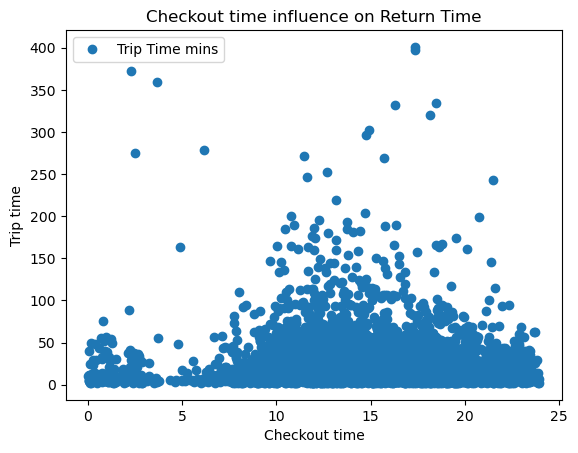

In [8]:
# Create a scatterplot comparing checkout time and trip time
# used sample because using entire dataset covered the whole field in dots

sample.plot(x = 'Checkout time float', y= 'Trip Time mins' ,style='o') 
plt.title('Checkout time influence on Return Time')  
plt.xlabel('Checkout time')  
plt.ylabel('Trip time')  
plt.show()

## 3. Prepare variables for regression 

In [9]:
#reshape variables for regression 
X = sample['Checkout time float'].values.reshape(-1, 1)
y = sample['Trip Time mins'].values.reshape(-1, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
#create linear regression object
regression = LinearRegression()

In [12]:
#fit regression to training set
regression.fit(X_train, y_train)

LinearRegression()

In [13]:
y_predicted = regression.predict(X_test)

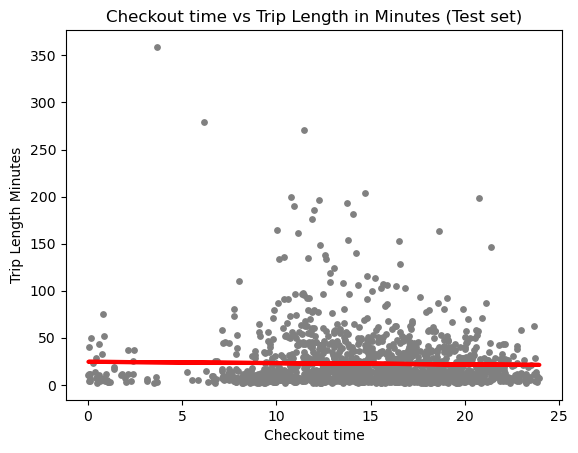

In [14]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Checkout time vs Trip Length in Minutes (Test set)')
plot_test.xlabel('Checkout time')
plot_test.ylabel('Trip Length Minutes')
plot_test.show()

### Hypothesis: The later in the day the checkout time the longer the ride will be

In [15]:
# Create objects for model mean squared error and R2 score

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [16]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.13755116]]
Mean squared error:  894.0873506060457
R2 score:  0.0027082959254010053


### as checkout time increases, trip time decreases by 0.455
### the MSE is quite large and R2 is quite small indicating a poor fit

In [17]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,28,21.473098
1,26,22.204411
2,27,21.583139
3,8,23.178732
4,46,22.784419
5,34,22.525364
6,3,22.025595
7,20,22.206704
8,27,22.571214
9,3,22.151683


### predicted values are very far off of actual values in many cases. This model is not good at predicting trip time based on the checkout time of day

## 4. Create a subset with checkout times between 5AM and 3PM to see if it can create a better fitting model

In [18]:
#create subset with checkout times between 5AM and 3PM and trips 1 hour or shorter
subset = metrobikes[(metrobikes['Checkout time float'] >= 5.00) & (metrobikes['Checkout time float'] <= 15.00) & (metrobikes['Trip Time mins'] <= 60.00)]
subset.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,...,Checkout Day of Month,Checkout Hour of Day,Checkout Kiosk Latitude,Checkout Kiosk Longitude,Return Kiosk Latitude,Return Kiosk Longitude,Trip Time Category,Kiosk_Zipcode,Checkout time float,Return time float
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,3,12,2017,...,1,9,30.269800,-97.741859,30.266340,-97.743782,Short trip,78701.0,9.850000,9.900000
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,22,10,2014,...,14,8,30.263041,-97.758240,30.264460,-97.756653,Typical Trip,78704.0,8.550000,8.916667
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,29,10,2014,...,14,8,30.267799,-97.751892,30.269800,-97.741859,Typical Trip,78701.0,8.533333,9.016667
6,16472401,Weekender,969,classic,2017-12-03 13:52:35,2017-12-03,13:52:35,18,12,2017,...,3,13,30.254570,-97.742577,30.254570,-97.742577,Typical Trip,78704.0,13.866667,14.166667
9,16491625,Walk Up,166,classic,2017-12-09 10:48:17,2017-12-09,10:48:17,10,12,2017,...,9,10,30.264521,-97.771202,30.264521,-97.771202,Typical Trip,78746.0,10.800000,10.966667


In [19]:
subset.shape

(760267, 30)

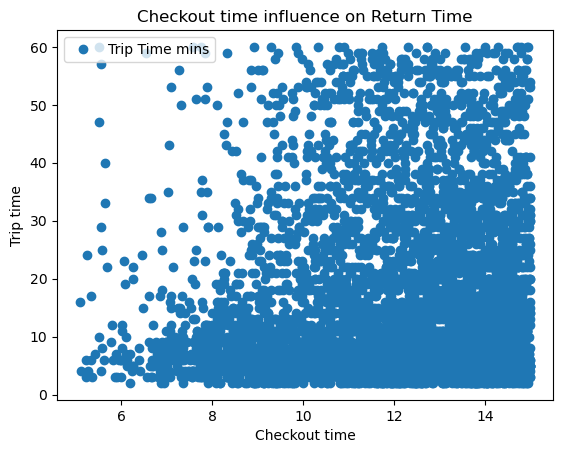

In [20]:
# Create a scatterplot comparing checkout time and trip time
sub_sample = subset.sample(n=5000)

sub_sample.plot(x = 'Checkout time float', y= 'Trip Time mins' ,style='o') 
plt.title('Checkout time influence on Return Time')  
plt.xlabel('Checkout time')  
plt.ylabel('Trip time')  
plt.show()

In [21]:
#reshape variables for regression 
Xs = sub_sample['Checkout time float'].values.reshape(-1, 1)
ys = sub_sample['Trip Time mins'].values.reshape(-1, 1)

In [22]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size = 0.3, random_state = 0)

In [23]:
#create linear regression object
sub_regression = LinearRegression()

In [24]:
#fit regression to training set
sub_regression.fit(Xs_train, ys_train)

LinearRegression()

In [25]:
ys_predicted = sub_regression.predict(Xs_test)

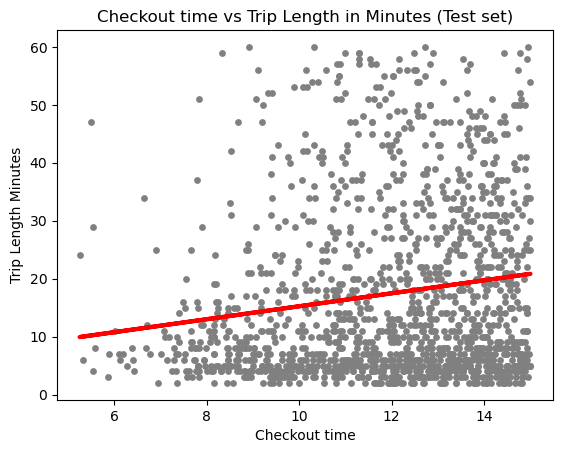

In [26]:
sub_plot_test = plt
plot_test.scatter(Xs_test, ys_test, color='gray', s = 15)
plot_test.plot(Xs_test, ys_predicted, color='red', linewidth =3)
plot_test.title('Checkout time vs Trip Length in Minutes (Test set)')
plot_test.xlabel('Checkout time')
plot_test.ylabel('Trip Length Minutes')
plot_test.show()

In [27]:
# Create objects for model mean squared error and R2 score

sub_rmse = mean_squared_error(ys_test, ys_predicted)
sub_r2 = r2_score(ys_test, ys_predicted)

In [28]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', sub_rmse)
print('R2 score: ', sub_r2)

Slope: [[-0.13755116]]
Mean squared error:  219.24430194769656
R2 score:  0.015440606946278357


### the MSE and R2 are larger in this instance but still indicate a poorly fitting model

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,28,21.473098
1,26,22.204411
2,27,21.583139
3,8,23.178732
4,46,22.784419
5,34,22.525364
6,3,22.025595
7,20,22.206704
8,27,22.571214
9,3,22.151683


### the predicted values compared to actual values support the poor fit of the model

## 5. Export dataset 

In [30]:
#check shape before export
metrobikes.shape

(1844301, 30)

In [31]:
#export file
metrobikes.to_pickle(os.path.join(path, 
                                  '02.Data', 
                                  'PreparedData', 
                                  'metrobikes_TimeAsFloats.pkl'))